In [2]:
from dark_emulator import model_hod
import numpy as np
import matplotlib.pyplot as plt

In [3]:
hod = model_hod.darkemu_x_hod({"fft_num":8})

In [4]:
cparam = np.array([0.02225,0.1198,0.6844,3.094,0.9645,-1.])
hod.set_cosmology(cparam)

gparam = {"logMmin":13.13, "sigma_sq":0.22, "logM1": 14.21, "alpha": 1.13, "kappa": 1.25, # HOD parameters
           "poff": 0.2, "Roff": 0.1, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
           "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
           "alpha_inc": 0.44, "logM_inc": 13.57} # incompleteness parameters. For details, see More et al. (2015)
hod.set_galaxy(gparam)

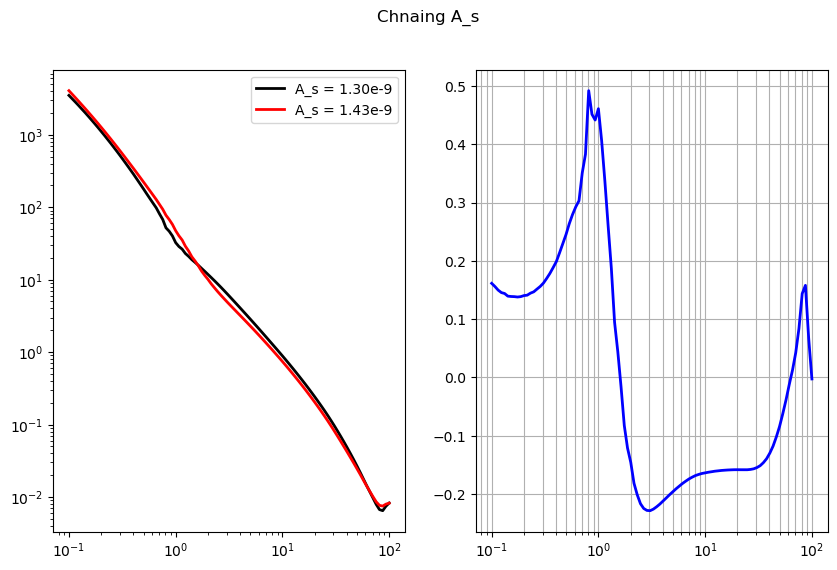

In [8]:
redshift = 0.55
r = np.logspace(-1,2,100)

fig, ax = plt.subplots(1,2,figsize=(10,6))

cparam = np.array([0.02225,0.1198,0.6844,2.6,0.9645,-1.])
hod.set_cosmology(cparam)
xi_lower = hod.get_xi_gg(r, redshift)
ax[0].loglog(r, xi_lower, linewidth = 2, color = "k", label = f"A_s = {np.exp(cparam[-3]/10):.2f}e-9")

cparam = np.array([0.02225,0.1198,0.6844,3.6,0.9645,-1.])
hod.set_cosmology(cparam)
xi_upper = hod.get_xi_gg(r, redshift)
ax[0].loglog(r, xi_upper, linewidth = 2, color = "r", label = f"A_s = {np.exp(cparam[-3]/10):.2f}e-9")
ax[1].plot(r, xi_upper/xi_lower - 1, linewidth = 2, color = "b", label = f"n_s = {np.exp(cparam[-2]/10):.2f}e-9")
fig.suptitle(f'Chnaing A_s')
ax[1].grid(which='both')
ax[1].set_xscale('log')
ax[0].legend()

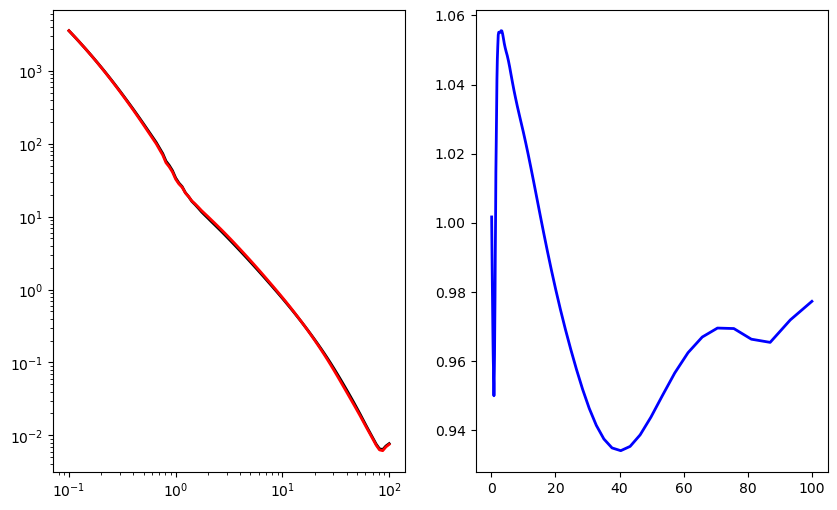

In [34]:
redshift = 0.55
r = np.logspace(-1,2,100)

fig, ax = plt.subplots(1,2,figsize=(10,6))

cparam = np.array([0.02225,0.1198,0.6844,3.0,0.97,-1.1])
hod.set_cosmology(cparam)
xi_lower = hod.get_xi_gg(r, redshift)
ax[0].loglog(r, xi_lower, linewidth = 2, color = "k", label = f"n_s = {np.exp(cparam[-2]/10):.2f}e-9")

cparam = np.array([0.02225,0.1198,0.6844,3.0,0.97,-0.9])
hod.set_cosmology(cparam)
xi_upper = hod.get_xi_gg(r, redshift)
ax[0].loglog(r, xi_upper, linewidth = 2, color = "r", label = f"n_s = {np.exp(cparam[-2]/10):.2f}e-9")
ax[1].plot(r, xi_upper/xi_lower, linewidth = 2, color = "b", label = f"n_s = {np.exp(cparam[-2]/10):.2f}e-9")